# Can we predict who would've survived the Titanic?

### This notebook goes through a basic exploratory data analysis of the Kaggle Titanic dataset with Python

Although this notebook works towards creating a Kaggle submission, it should not be taken as exhaustive list of things to do with a dataset. It has been setup as an introduction to get you started with exploratory data analysis (EDA).

There are challenges and extensions listed throughout. I encourage you to take the foundations here and build upon them.

If you complete the challenges or get a better score than the one listed at the bottom of this notebook, [tweet me](www.twitter.com/mrdbourke) and I'llgive your work a shout out.

If you're interested, there's a video walkthrough of this notebook available on my YouTube: https://youtu.be/f1y9wDDxWnA

Keep learning,

Daniel

## Step 0: Why EDA?


Not all data comes in a neat little package ready to be modelled by the latest and greatest machine learning models.

Most of the time, you'll get a dataset you don't know much about. So before you can make any solid predictions, you'll to find out more.

This is where EDA comes in.

The main thing to remember is the first word. Exploratory. You're trying to figure out more about the data so you can build a model the best way you can.

You'll usually do this when you first look at a dataset but it'll continually happen as you learn more. EDA is an iterative process. There's no one way to do it either. It'll vary with each new dataset but there are some things you'll find yourself doing more often, we'll talk about those in this notebook and in a future blog post.


## Step 1: Download the data

You can download the data for this notebook here: https://www.kaggle.com/c/titanic/data

## Step 2: Work through the notebook
    
First we will import all the relevant dependencies we need.

If you don't have any of these, the notebook will throw an error. The error will likely tell you what you don't have. Then you'll have to install it.

You can usually figure out how to install it by Googling: "how to install [the thing you don't have]".

**PS** If you have any questions, feedback, advice or bug fixes, please let me know.

In [1]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
# import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

### Loading in the data

After we've downloaded the data, we need to get it into the notebook.

I've stored my downloaded data in a file called `data`.

In [2]:
# Import train & test data 
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv') # example of what a submission should look like

In [3]:
# View the training data
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
# View the test data (same columns as the training data)
test.head() # head = view first 5 lines

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [5]:
# View the example submisison dataframe
gender_submission.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

## Data Descriptions

**Survival:** 0 = No, 1 = Yes

**pclass (Ticket class):** 1 = 1st, 2 = 2nd, 3 = 3rd

**sex:** Sex

**Age:** Age in years

**sibsp:** number of siblings/spouses aboard the Titanic

**parch:** number of parents/children aboard the Titanic

**ticket:** Ticket number

**fare:** Passenger fare

**cabin:** Cabin number

**embarked:** Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

In [6]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

## What missing values are there?

Where are the holes in our data?

These are rows which are missing a value or have NaN instead of something like the rest of the column.

In [7]:
# Plot graphic of missing values
# missingno.matrix(train, figsize = (30,10))

Ok we can clearly see some missing values here. Especially in the cabin column.

It's important to visualise missing values early so you know where the major holes are in your dataset.

Knowing this informaiton will help with your EDA and figuring out what kind of data cleaning and preprocessing is needed.

In [8]:
# Let's write a little function to show us how many missing values
# there are
def find_missing_values(df, columns):
    """
    Finds number of rows where certain columns are missing values.
    ::param_df:: = target dataframe
    ::param_columns:: = list of columns
    """
    missing_vals = {}
    print("Number of missing or NaN values for each column:")
    df_length = len(df)
    for column in columns:
        total_column_values = df[column].value_counts().sum()
        missing_vals[column] = df_length-total_column_values
        #missing_vals.append(str(column)+ " column has {} missing or NaN values.".format())
    return missing_vals

missing_values = find_missing_values(train, columns=train.columns)
missing_values

Number of missing or NaN values for each column:


{'Age': 177,
 'Cabin': 687,
 'Embarked': 2,
 'Fare': 0,
 'Name': 0,
 'Parch': 0,
 'PassengerId': 0,
 'Pclass': 0,
 'Sex': 0,
 'SibSp': 0,
 'Survived': 0,
 'Ticket': 0}

## To perform our data analysis, let's create two new dataframes

We'll create one for exploring discretised continuous variables (continuous variables which have been sorted into some kind of category) and another for exploring continuous variables.

In [9]:
df_bin = pd.DataFrame() # for discretised continuous variables
df_con = pd.DataFrame() # for continuous variables

## What datatypes are in the dataframe?

As a general rule of thumb, features with a datatype of object could be considered categorical features. And those which are floats or ints (numbers) could be considered numerical features.

However, as we dig deeper, we might find features which are numerical may actually be categorical.

The goal for the next few steps is to figure out how best to process the data so our machine learning model can learn from it.

Ideally, all the features will be encoded into a numerical value of some kind. 

In [10]:
# Different data types in the dataset
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Let's explore each of these features individually
We'll go through each column iteratively and see which ones to use in our first models.
Some may need more preprocessing than others to get ready.

In [11]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

### Target Feature: Survived

Description: Whether the passenger survived or not.
    
Key: 0 = did not survive, 1 = survived
    
This is the variable we want our machine learning model to predict based off all the others.

0    549
1    342
Name: Survived, dtype: int64


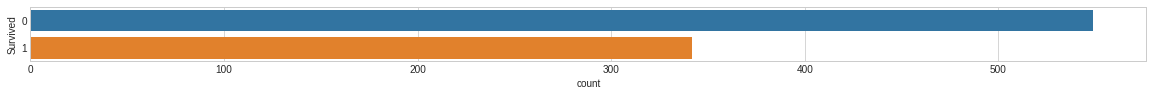

In [12]:
# How many people survived?
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Survived', data=train);
print(train.Survived.value_counts())

In [13]:
# Let's add this to our subset dataframes
df_bin['Survived'] = train['Survived']
df_con['Survived'] = train['Survived']

In [14]:
df_bin.head()

Survived
0         0
1         1
2         1
3         1
4         0

In [15]:
df_con.head()

Survived
0         0
1         1
2         1
3         1
4         0

### Feature: Pclass

Description: The ticket class of the passenger.
    
Key: 1 = 1st, 2 = 2nd, 3 = 3rd

#### Let's plot the distribution
We will look at the distribution of each feature first if we can to understand what kind of spread there is across the dataset.

For example, if there are values which are completely outside of the distribution, we may not want to include them in our model.

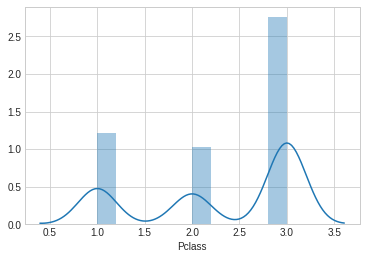

In [16]:
sns.distplot(train.Pclass)

We can see with this feature, the values are numerical (1, 2 and 3) but they are categories.

How do we know this? Because a passenger in Class 3 doesn't necessarily equal a passenger in Class 2 + a passenger in Class 1.

In [17]:
# How many missing variables does Pclass have?
missing_values['Pclass']

0

Since there are no missing values in Pclass, let's add it to our sub dataframes.

In [18]:
df_bin['Pclass'] = train['Pclass']
df_con['Pclass'] = train['Pclass']

### Feature: Name
    
Description: The name of the passenger.

In [19]:
# How many different names are there?
train.Name.value_counts()

Millet, Mr. Francis Davis                          1
Baxter, Mrs. James (Helene DeLaudeniere Chaput)    1
Newsom, Miss. Helen Monypeny                       1
Toufik, Mr. Nakli                                  1
Hagland, Mr. Ingvald Olai Olsen                    1
Graham, Miss. Margaret Edith                       1
Ekstrom, Mr. Johan                                 1
Graham, Mr. George Edward                          1
Wick, Mrs. George Dennick (Mary Hitchcock)         1
McCoy, Miss. Agnes                                 1
Quick, Miss. Phyllis May                           1
Kelly, Miss. Mary                                  1
Nysten, Miss. Anna Sofia                           1
Niskanen, Mr. Juha                                 1
Keefe, Mr. Arthur                                  1
Allison, Master. Hudson Trevor                     1
Seward, Mr. Frederic Kimber                        1
Healy, Miss. Hanora "Nora"                         1
Spencer, Mrs. William Augustus (Marie Eugenie)

Every row has a unique name. This is equivalent to the passenger ID. But name could be used differently.

Can you think of ways you could reduce the number of different names? Or create new features out of the names?

**Note:** Because of so many different names and to keep this EDA fast, we won't move forward using the name variable.

### Feature: Sex

Description: The sex of the passenger (male or female).

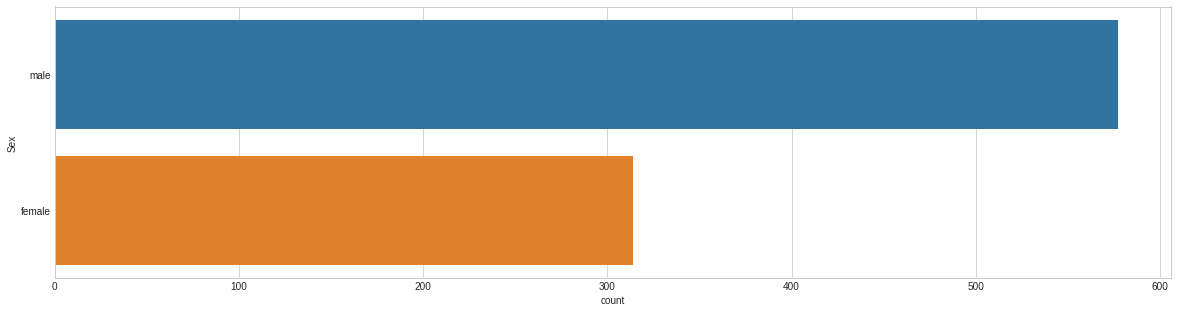

In [20]:
# Let's view the distribution of Sex
plt.figure(figsize=(20, 5))
sns.countplot(y="Sex", data=train);

In [21]:
# Are there any missing values in the Sex column?
missing_values['Sex']

0

Since this is already binary variable (male or female), let's add it straight to our subset dataframes.

In [22]:
train.Sex.head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [23]:
# add Sex to the subset dataframes
df_bin['Sex'] = train['Sex']
df_bin['Sex'] = np.where(df_bin['Sex'] == 'female', 1, 0) # change sex to 0 for male and 1 for female

df_con['Sex'] = train['Sex']

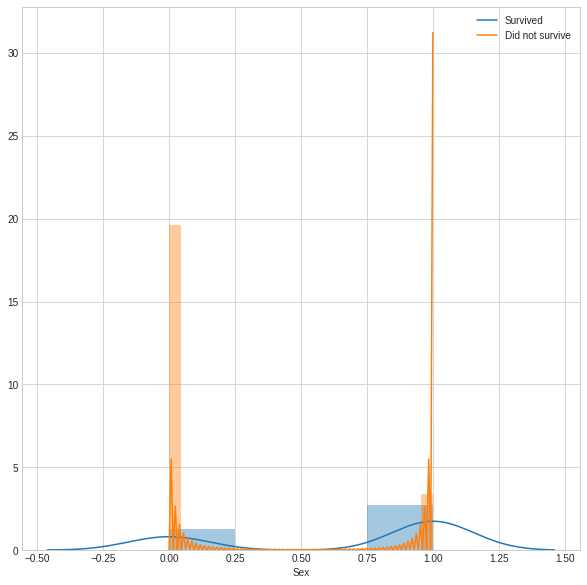

In [24]:
# How does the Sex variable look compared to Survival?
# We can see this because they're both binarys.
fig = plt.figure(figsize=(10, 10))
sns.distplot(df_bin.loc[df_bin['Survived'] == 1]['Sex'], kde_kws={'label': 'Survived'});
sns.distplot(df_bin.loc[df_bin['Survived'] == 0]['Sex'], kde_kws={'label': 'Did not survive'});

Not many people survived. But of those who did, more were female.

### Feature: Age

Description: The age of the passenger.

In [25]:
# How many missing values does age have?
missing_values['Age']

177

Out of a total 891 rows, that's almost one quarter of the dataset.

What would you do with these missing values?

Could replace them with the average age? What's the pro's and con's of doing this?

Or would you get rid of them completely?

We won't answer these questions in our initial EDA but this is something we would definitely revisit at a later date.


In [26]:
# Once the Age values have been fixed up, we can add them to our sub dataframes.
# df_bin['Age'] = pd.cut(train['Age'], 10) # bucketed/binned into different categories
# df_con['Age'] = train['Age'] # non-bucketed

**Challenge:** How would you fill the missing variables in the `Age` column?

#### Function to create count and distribution visualisations

In [27]:
def plot_count_dist(data, bin_df, label_column, target_column, figsize=(20, 5), use_bin_df=False):
    """
    Function to plot counts and distributions of a label variable and 
    target variable side by side.
    ::param_data:: = target dataframe
    ::param_bin_df:: = binned dataframe for countplot
    ::param_label_column:: = binary labelled column
    ::param_target_column:: = column you want to view counts and distributions
    ::param_figsize:: = size of figure (width, height)
    ::param_use_bin_df:: = whether or not to use the bin_df, default False
    """
    if use_bin_df: 
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=bin_df);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=data);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});

### Feature: SibSp

Description: The number of siblings/spouses the passenger has aboard the Titanic.

In [28]:
# How many missing values does SibSp have?
missing_values['SibSp']

0

In [29]:
# What values are there?
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

Let's add SibSp to our subset dataframes and view the distributions.

In [30]:
# Add SibSp to subset dataframes
df_bin['SibSp'] = train['SibSp']
df_con['SibSp'] = train['SibSp']

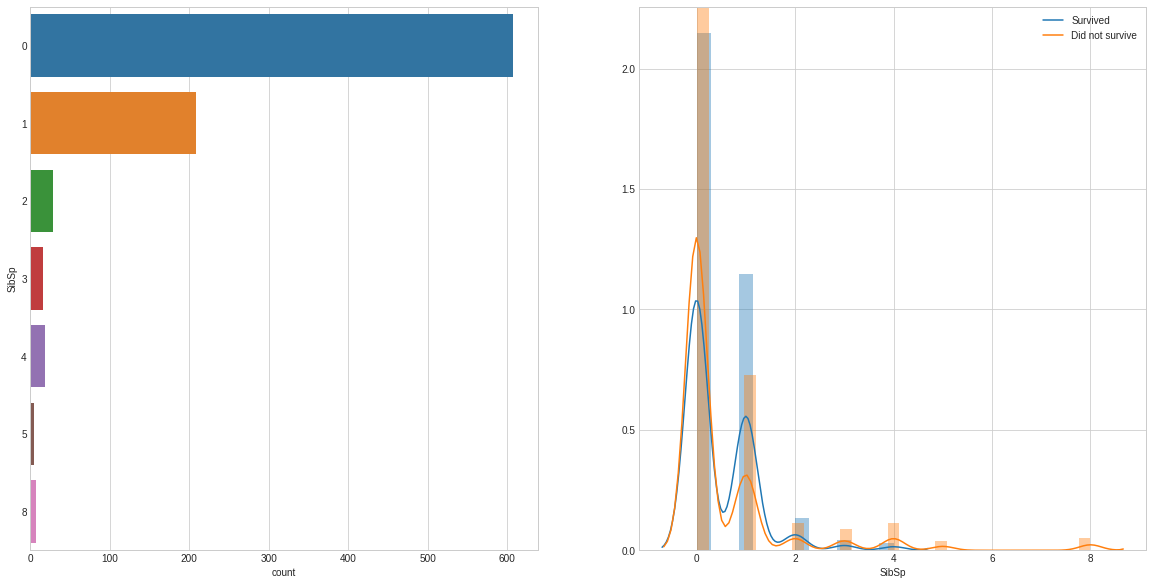

In [31]:
# Visualise the counts of SibSp and the distribution of the values
# against Survived
plot_count_dist(train, 
                bin_df=df_bin, 
                label_column='Survived', 
                target_column='SibSp', 
                figsize=(20, 10))

What does the graph on the right tell us?

### Feature: Parch

Description: The number of parents/children the passenger has aboard the Titanic.

Since this feature is similar to SibSp, we'll do a similar analysis.

In [32]:
# How many missing values does SibSp have?
missing_values['Parch']

0

In [33]:
# What values are there?
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [34]:
# Add Parch to subset dataframes
df_bin['Parch'] = train['Parch']
df_con['Parch'] = train['Parch']

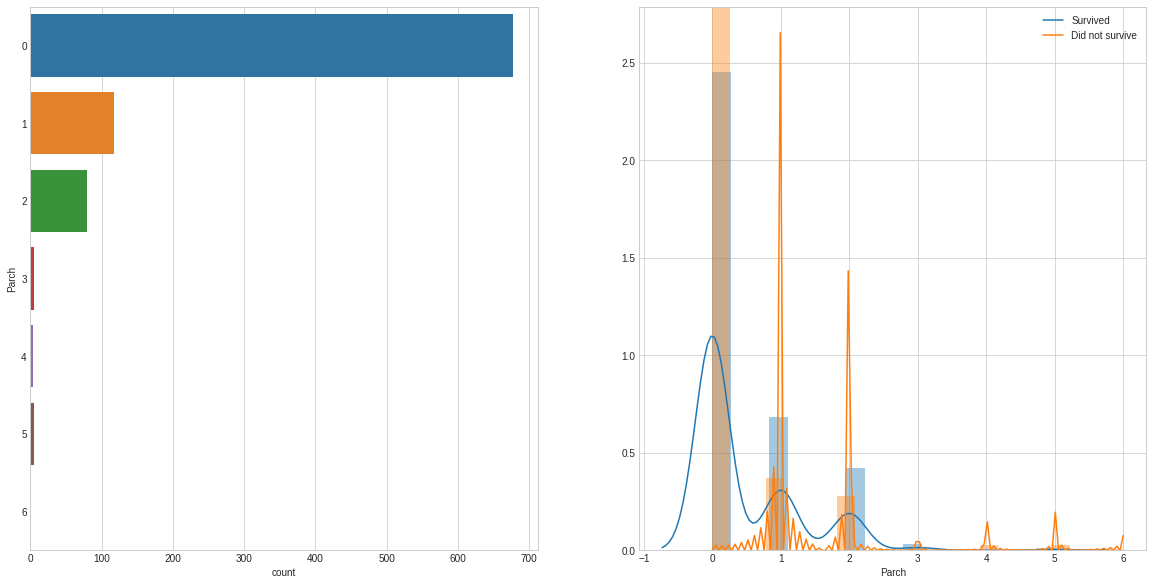

In [35]:
# Visualise the counts of Parch and the distribution of the values
# against Survived
plot_count_dist(train, 
                bin_df=df_bin,
                label_column='Survived', 
                target_column='Parch', 
                figsize=(20, 10))

What does the graph on the right tell us about `Parch`?

In [36]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [37]:
df_con.head()

Survived  Pclass     Sex  SibSp  Parch
0         0       3    male      1      0
1         1       1  female      1      0
2         1       3  female      0      0
3         1       1  female      1      0
4         0       3    male      0      0

### Feature: Ticket

Description: The ticket number of the boarding passenger.

In [38]:
# How many missing values does Ticket have?
missing_values['Ticket']

0

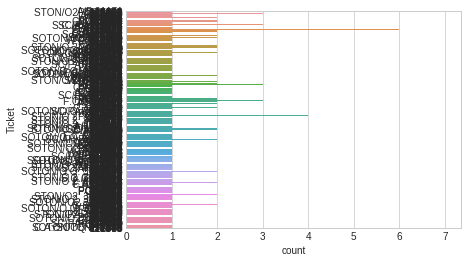

In [39]:
# How many kinds of ticket are there?
sns.countplot(y="Ticket", data=train);

That doesn't look too good, what about another way of looking at it?

In [40]:
# How many kinds of ticket are there?
train.Ticket.value_counts()

CA. 2343             7
1601                 7
347082               7
347088               6
3101295              6
CA 2144              6
382652               5
S.O.C. 14879         5
113760               4
347077               4
LINE                 4
113781               4
4133                 4
349909               4
W./C. 6608           4
PC 17757             4
2666                 4
17421                4
19950                4
248727               3
C.A. 34651           3
PC 17755             3
371110               3
24160                3
29106                3
PC 17760             3
C.A. 31921           3
13502                3
F.C.C. 13529         3
SC/Paris 2123        3
                    ..
345763               1
367228               1
370370               1
SC/PARIS 2149        1
383121               1
29751                1
349210               1
364512               1
2223                 1
315098               1
349912               1
C 4001               1
347081     

In [41]:
# How many unique kinds of Ticket are there?
print("There are {} unique Ticket values.".format(len(train.Ticket.unique())))

There are 681 unique Ticket values.


681 unique values is too many for now. So we won't use `Ticket` in our subset dataframes.

There may be some way to reduce this down. 

**Challenge:** How could you reduce the Ticket feature? Is it even possible?

*Hint:* It may be similar to what you could do with Name.

### Feature: Fare

Description: How much the ticket cost.

In [42]:
# How many missing values does Fare have?
missing_values['Fare']

0

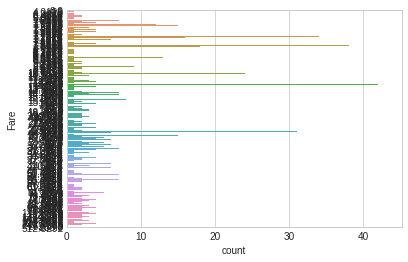

In [43]:
# How many different values of Fare are there?
sns.countplot(y="Fare", data=train);

In [44]:
# What kind of variable is Fare?
train.Fare.dtype

dtype('float64')

In [45]:
# How many unique kinds of Fare are there?
print("There are {} unique Fare values.".format(len(train.Fare.unique())))

There are 248 unique Fare values.


Because Fare is a float (number) let's add it as it is to our continuous sub dataframe but to add it to our categorical sub dataframe, we'll cut it into bins.

In [46]:
# Add Fare to sub dataframes
df_con['Fare'] = train['Fare'] 
df_bin['Fare'] = pd.cut(train['Fare'], bins=5) # discretised 

In [47]:
# What do our Fare bins look like?
df_bin.Fare.value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

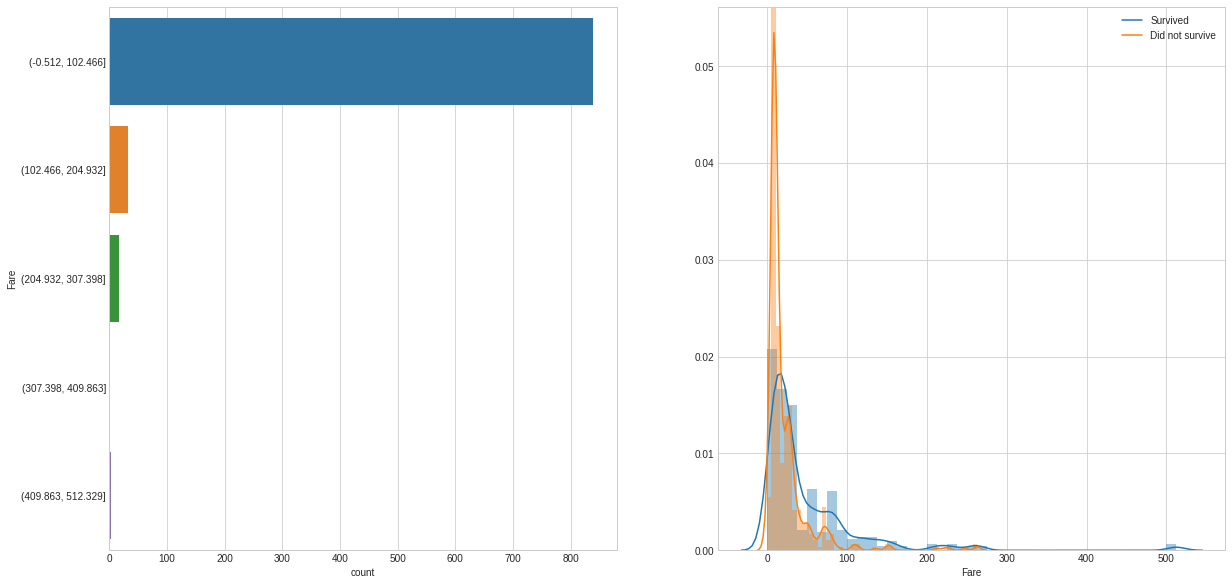

In [48]:
# Visualise the Fare bin counts as well as the Fare distribution versus Survived.
plot_count_dist(data=train,
                bin_df=df_bin,
                label_column='Survived', 
                target_column='Fare', 
                figsize=(20,10), 
                use_bin_df=True)

**Challenge:** How would you change the Fare bins?

### Feature: Cabin

Description: The cabin number where the passenger was staying.    

In [49]:
# How many missing values does Cabin have?
missing_values['Cabin']

687

In [50]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [51]:
# What do the Cabin values look like?
train.Cabin.value_counts()

B96 B98            4
G6                 4
C23 C25 C27        4
C22 C26            3
E101               3
F33                3
D                  3
F2                 3
B49                2
E121               2
C93                2
B28                2
D20                2
B77                2
D35                2
D17                2
B51 B53 B55        2
F4                 2
D36                2
B58 B60            2
C65                2
D33                2
B20                2
C68                2
B57 B59 B63 B66    2
C123               2
C125               2
E33                2
F G73              2
B35                2
                  ..
E49                1
B73                1
C106               1
A36                1
D56                1
E68                1
B78                1
B94                1
B3                 1
E40                1
D49                1
A20                1
E17                1
B69                1
C99                1
D15                1
A32          

Since there are too many missing values, we won't use Cabin for our initial models and won't add it to our sub dataframes.

But how could you modify cabin to be more usable?

What could you do about the missing values?

### Feature: Embarked

Description: The port where the passenger boarded the Titanic.
    
Key: C = Cherbourg, Q = Queenstown, S = Southampton

In [52]:
# How many missing values does Embarked have?
missing_values['Embarked']

2

In [53]:
# What kind of values are in Embarked?
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Embarked is a categorical variable because there are 3 categories which a passenger could have boarded on.

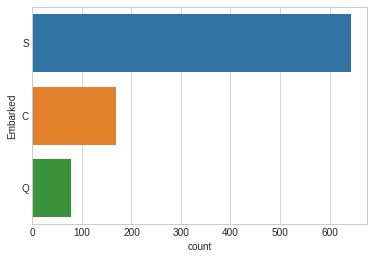

In [54]:
# What do the counts look like?
sns.countplot(y='Embarked', data=train);

#### How can we deal with the 2 missing values of Embarked?

One option is to drop the two rows which don't have an Embarked value.

Another option would be to randomly assign a value of C, Q or S to each row.

What are the pros and cons of each?

For now, we will remove those rows.

In [55]:
# Add Embarked to sub dataframes
df_bin['Embarked'] = train['Embarked']
df_con['Embarked'] = train['Embarked']

In [56]:
# Remove Embarked rows which are missing values
print(len(df_con))
df_con = df_con.dropna(subset=['Embarked'])
df_bin = df_bin.dropna(subset=['Embarked'])
print(len(df_con))

891
889


We've removed the two rows with missing values for Embarked, now we can add Embarked to our sub dataframes.

## Feature Encoding
Now we have our two sub dataframes ready. We can encode the features so they're ready to be used with our machine learning models.

We will encode our binned dataframe (`df_bin`) with one-hot encoding and our continuous dataframe (`df_con`) with the label encoding function from `sklearn`.

In [57]:
df_bin.head()

Survived  Pclass  Sex  SibSp  Parch               Fare Embarked
0         0       3    0      1      0  (-0.512, 102.466]        S
1         1       1    1      1      0  (-0.512, 102.466]        C
2         1       3    1      0      0  (-0.512, 102.466]        S
3         1       1    1      1      0  (-0.512, 102.466]        S
4         0       3    0      0      0  (-0.512, 102.466]        S

In [58]:
# One-hot encode binned variables
one_hot_cols = df_bin.columns.tolist()
one_hot_cols.remove('Survived')
df_bin_enc = pd.get_dummies(df_bin, columns=one_hot_cols)

df_bin_enc.head()

Survived  Pclass_1  Pclass_2  Pclass_3  Sex_0  Sex_1  SibSp_0  SibSp_1  \
0         0         0         0         1      1      0        0        1   
1         1         1         0         0      0      1        0        1   
2         1         0         0         1      0      1        1        0   
3         1         1         0         0      0      1        0        1   
4         0         0         0         1      1      0        1        0   

   SibSp_2  SibSp_3     ...      Parch_5  Parch_6  Fare_(-0.512, 102.466]  \
0        0        0     ...            0        0                       1   
1        0        0     ...            0        0                       1   
2        0        0     ...            0        0                       1   
3        0        0     ...            0        0                       1   
4        0        0     ...            0        0                       1   

   Fare_(102.466, 204.932]  Fare_(204.932, 307.398]  Fare_(307.398, 409.863]  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   Fare_(409.863, 512.329]  Embarked_C  Embarked_Q  Embarked_S  
0                        0           0           0           1  
1                        0           1           0           0  
2                        0           0           0           1  
3                        0           0           0           1  
4                        0           0           0           1  

[5 rows x 28 columns]

In [59]:
df_con.head(10)

Survived  Pclass     Sex  SibSp  Parch     Fare Embarked
0         0       3    male      1      0   7.2500        S
1         1       1  female      1      0  71.2833        C
2         1       3  female      0      0   7.9250        S
3         1       1  female      1      0  53.1000        S
4         0       3    male      0      0   8.0500        S
5         0       3    male      0      0   8.4583        Q
6         0       1    male      0      0  51.8625        S
7         0       3    male      3      1  21.0750        S
8         1       3  female      0      2  11.1333        S
9         1       2  female      1      0  30.0708        C

In [60]:
# Label Encode all continuous values using LabelEncoder()
df_con_enc = df_con.apply(LabelEncoder().fit_transform)

df_con_enc.head(20)

Survived  Pclass  Sex  SibSp  Parch  Fare  Embarked
0          0       2    1      1      0    18         2
1          1       0    0      1      0   207         0
2          1       2    0      0      0    41         2
3          1       0    0      1      0   189         2
4          0       2    1      0      0    43         2
5          0       2    1      0      0    51         1
6          0       0    1      0      0   186         2
7          0       2    1      3      1   124         2
8          1       2    0      0      2    74         2
9          1       1    0      1      0   154         0
10         1       2    0      1      1   110         2
11         1       0    0      0      0   143         2
12         0       2    1      0      0    43         2
13         0       2    1      1      5   158         2
14         0       2    0      0      0    36         2
15         1       1    0      0      0   108         2
16         0       2    1      4      1   151         1
17         1       1    1      0      0    85         2
18         0       2    0      1      0   113         2
19         1       2    0      0      0    16         0

## Start Building Machine Learning Models
Now our data has been manipulating and converted to numbers, we can run a series of different machine learning algorithms over it to find which yield the best results.

### Let's seperate the data

In [61]:
# Seclect the dataframe we want to use first for predictions
selected_df = df_con_enc

In [62]:
selected_df.head()

Survived  Pclass  Sex  SibSp  Parch  Fare  Embarked
0         0       2    1      1      0    18         2
1         1       0    0      1      0   207         0
2         1       2    0      0      0    41         2
3         1       0    0      1      0   189         2
4         0       2    1      0      0    43         2

In [63]:
# Split the dataframe into data and labels
X_train = selected_df.drop('Survived', axis=1) # data
y_train = selected_df.Survived # labels

In [64]:
# Shape of the data (without labels)
X_train.shape

(889, 6)

In [65]:
# Shape of the labels
y_train.shape

(889,)

### Define a function to fit machine learning algorithms
Since many of the algorithms we will use are from the sklearn library, they all take similar (practically the same) inputs and produce similar outputs.

To prevent writing code multiple times, we will functionise fitting the model and returning the accuracy scores.

In [66]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

### Logistic Regression

In [67]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 79.08
Accuracy CV 10-Fold: 78.52
Running Time: 0:00:00.274534


### K-Nearest Neighbours

In [68]:
# k-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 81.44
Accuracy CV 10-Fold: 73.68
Running Time: 0:00:00.211393


### Gaussian Naive Bayes

In [69]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 76.72
Accuracy CV 10-Fold: 76.38
Running Time: 0:00:00.240862


### Linear Support Vector Machines (SVC)

In [70]:
# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 77.28
Accuracy CV 10-Fold: 76.72
Running Time: 0:00:00.494987


### Stochastic Gradient Descent

In [71]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  X_train, 
                                                  y_train,
                                                  10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 61.75
Accuracy CV 10-Fold: 60.18
Running Time: 0:00:00.216536


### Decision Tree Classifier

In [72]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 92.46
Accuracy CV 10-Fold: 79.42
Running Time: 0:00:00.234188


### Gradient Boost Trees

In [73]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       X_train, 
                                                                       y_train,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 86.39
Accuracy CV 10-Fold: 81.1
Running Time: 0:00:00.610367


### CatBoost Algorithm
CatBoost is a state-of-the-art open-source gradient boosting on decision trees library.

It's simple and easy to use. And is now regularly one of my go-to algorithms for any kind of machine learning task.

For more on CatBoost and the methods it uses to deal with categorical variables, check out the [CatBoost docs](https://catboost.ai/).

In [74]:
# View the data for the CatBoost model
X_train.head()

Pclass  Sex  SibSp  Parch  Fare  Embarked
0       2    1      1      0    18         2
1       0    0      1      0   207         0
2       2    0      0      0    41         2
3       0    0      1      0   189         2
4       2    1      0      0    43         2

In [75]:
# View the labels for the CatBoost model
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [76]:
# Define the categorical features for the CatBoost model
cat_features = np.where(X_train.dtypes != np.float)[0]
cat_features

array([0, 1, 2, 3, 4, 5])

This means Catboost has picked up that all variables except `Fare` can be treated as categorical.

In [77]:
# Use the CatBoost Pool() function to pool together the training data and categorical feature labels
train_pool = Pool(X_train, 
                  y_train,
                  cat_features)

In [78]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [79]:
# CatBoost model definition
catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,
                   plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(X_train, y_train) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.016206
0:	learn: 0.6838699	total: 61.5ms	remaining: 1m 1s
1:	learn: 0.6753070	total: 73.5ms	remaining: 36.7s
2:	learn: 0.6664907	total: 106ms	remaining: 35.2s


3:	learn: 0.6580711	total: 128ms	remaining: 31.8s
4:	learn: 0.6509907	total: 138ms	remaining: 27.4s
5:	learn: 0.6428456	total: 157ms	remaining: 26s
6:	learn: 0.6358374	total: 179ms	remaining: 25.4s
7:	learn: 0.6285425	total: 196ms	remaining: 24.3s
8:	learn: 0.6215779	total: 214ms	remaining: 23.5s
9:	learn: 0.6151968	total: 229ms	remaining: 22.7s
10:	learn: 0.6090478	total: 248ms	remaining: 22.3s
11:	learn: 0.6030273	total: 266ms	remaining: 21.9s
12:	learn: 0.5975315	total: 282ms	remaining: 21.4s
13:	learn: 0.5918302	total: 299ms	remaining: 21.1s
14:	learn: 0.5864084	total: 313ms	remaining: 20.6s
15:	learn: 0.5819175	total: 322ms	remaining: 19.8s
16:	learn: 0.5766028	total: 343ms	remaining: 19.8s
17:	learn: 0.5726184	total: 354ms	remaining: 19.3s
18:	learn: 0.5680301	total: 373ms	remaining: 19.2s
19:	learn: 0.5632747	total: 398ms	remaining: 19.5s
20:	learn: 0.5593913	total: 408ms	remaining: 19s
21:	learn: 0.5551887	total: 423ms	remaining: 18.8s
22:	learn: 0.5514062	total: 433ms	remainin

173:	learn: 0.4145372	total: 2.19s	remaining: 10.4s
174:	learn: 0.4143450	total: 2.2s	remaining: 10.4s
175:	learn: 0.4141462	total: 2.21s	remaining: 10.3s
176:	learn: 0.4140123	total: 2.22s	remaining: 10.3s
177:	learn: 0.4135955	total: 2.23s	remaining: 10.3s
178:	learn: 0.4134012	total: 2.25s	remaining: 10.3s
179:	learn: 0.4130787	total: 2.26s	remaining: 10.3s
180:	learn: 0.4128360	total: 2.27s	remaining: 10.3s
181:	learn: 0.4125693	total: 2.28s	remaining: 10.2s
182:	learn: 0.4125013	total: 2.28s	remaining: 10.2s
183:	learn: 0.4124307	total: 2.29s	remaining: 10.1s
184:	learn: 0.4122352	total: 2.31s	remaining: 10.2s
185:	learn: 0.4121208	total: 2.31s	remaining: 10.1s
186:	learn: 0.4120520	total: 2.32s	remaining: 10.1s
187:	learn: 0.4119839	total: 2.33s	remaining: 10s
188:	learn: 0.4119515	total: 2.33s	remaining: 10s
189:	learn: 0.4119477	total: 2.34s	remaining: 9.98s
190:	learn: 0.4118782	total: 2.35s	remaining: 9.96s
191:	learn: 0.4114546	total: 2.36s	remaining: 9.92s
192:	learn: 0.411

343:	learn: 0.3962155	total: 3.81s	remaining: 7.27s
344:	learn: 0.3959123	total: 3.83s	remaining: 7.28s
345:	learn: 0.3956901	total: 3.85s	remaining: 7.27s
346:	learn: 0.3956692	total: 3.86s	remaining: 7.26s
347:	learn: 0.3950075	total: 3.88s	remaining: 7.26s
348:	learn: 0.3949261	total: 3.9s	remaining: 7.27s
349:	learn: 0.3948790	total: 3.91s	remaining: 7.26s
350:	learn: 0.3948721	total: 3.92s	remaining: 7.25s
351:	learn: 0.3948589	total: 3.93s	remaining: 7.24s
352:	learn: 0.3948406	total: 3.94s	remaining: 7.22s
353:	learn: 0.3946202	total: 3.95s	remaining: 7.21s
354:	learn: 0.3944388	total: 3.97s	remaining: 7.22s
355:	learn: 0.3944293	total: 3.98s	remaining: 7.21s
356:	learn: 0.3944293	total: 3.99s	remaining: 7.19s
357:	learn: 0.3943055	total: 4.01s	remaining: 7.2s
358:	learn: 0.3941936	total: 4.02s	remaining: 7.18s
359:	learn: 0.3940117	total: 4.04s	remaining: 7.19s
360:	learn: 0.3937313	total: 4.05s	remaining: 7.18s
361:	learn: 0.3936711	total: 4.07s	remaining: 7.17s
362:	learn: 0.

515:	learn: 0.3804490	total: 6.11s	remaining: 5.73s
516:	learn: 0.3804082	total: 6.12s	remaining: 5.71s
517:	learn: 0.3802327	total: 6.13s	remaining: 5.7s
518:	learn: 0.3801872	total: 6.14s	remaining: 5.7s
519:	learn: 0.3800374	total: 6.16s	remaining: 5.68s
520:	learn: 0.3798890	total: 6.16s	remaining: 5.67s
521:	learn: 0.3798683	total: 6.17s	remaining: 5.65s
522:	learn: 0.3798369	total: 6.18s	remaining: 5.64s
523:	learn: 0.3795123	total: 6.2s	remaining: 5.63s
524:	learn: 0.3795052	total: 6.2s	remaining: 5.61s
525:	learn: 0.3794015	total: 6.21s	remaining: 5.6s
526:	learn: 0.3793838	total: 6.22s	remaining: 5.58s
527:	learn: 0.3791994	total: 6.23s	remaining: 5.57s
528:	learn: 0.3789892	total: 6.24s	remaining: 5.55s
529:	learn: 0.3786606	total: 6.25s	remaining: 5.54s
530:	learn: 0.3779682	total: 6.25s	remaining: 5.53s
531:	learn: 0.3778443	total: 6.26s	remaining: 5.51s
532:	learn: 0.3776968	total: 6.28s	remaining: 5.5s
533:	learn: 0.3774443	total: 6.29s	remaining: 5.49s
534:	learn: 0.3772

690:	learn: 0.3572523	total: 8.16s	remaining: 3.65s
691:	learn: 0.3571556	total: 8.18s	remaining: 3.64s
692:	learn: 0.3571061	total: 8.19s	remaining: 3.63s
693:	learn: 0.3570496	total: 8.2s	remaining: 3.62s
694:	learn: 0.3569267	total: 8.21s	remaining: 3.6s
695:	learn: 0.3569105	total: 8.22s	remaining: 3.59s
696:	learn: 0.3566512	total: 8.24s	remaining: 3.58s
697:	learn: 0.3565839	total: 8.25s	remaining: 3.57s
698:	learn: 0.3564906	total: 8.26s	remaining: 3.56s
699:	learn: 0.3563476	total: 8.27s	remaining: 3.54s
700:	learn: 0.3561882	total: 8.29s	remaining: 3.53s
701:	learn: 0.3560512	total: 8.3s	remaining: 3.52s
702:	learn: 0.3559325	total: 8.31s	remaining: 3.51s
703:	learn: 0.3558271	total: 8.33s	remaining: 3.5s
704:	learn: 0.3558037	total: 8.36s	remaining: 3.5s
705:	learn: 0.3557431	total: 8.38s	remaining: 3.49s
706:	learn: 0.3555640	total: 8.39s	remaining: 3.48s
707:	learn: 0.3554730	total: 8.41s	remaining: 3.47s
708:	learn: 0.3553534	total: 8.42s	remaining: 3.46s
709:	learn: 0.355

852:	learn: 0.3388830	total: 11.3s	remaining: 1.94s
853:	learn: 0.3388107	total: 11.3s	remaining: 1.93s
854:	learn: 0.3387254	total: 11.3s	remaining: 1.92s
855:	learn: 0.3386988	total: 11.3s	remaining: 1.91s
856:	learn: 0.3385198	total: 11.4s	remaining: 1.9s
857:	learn: 0.3384024	total: 11.4s	remaining: 1.88s
858:	learn: 0.3383718	total: 11.4s	remaining: 1.87s
859:	learn: 0.3382605	total: 11.4s	remaining: 1.86s
860:	learn: 0.3381329	total: 11.4s	remaining: 1.84s
861:	learn: 0.3381221	total: 11.4s	remaining: 1.83s
862:	learn: 0.3379470	total: 11.5s	remaining: 1.82s
863:	learn: 0.3378262	total: 11.5s	remaining: 1.81s
864:	learn: 0.3377202	total: 11.5s	remaining: 1.79s
865:	learn: 0.3376902	total: 11.5s	remaining: 1.78s
866:	learn: 0.3376455	total: 11.5s	remaining: 1.77s
867:	learn: 0.3376033	total: 11.5s	remaining: 1.75s
868:	learn: 0.3374610	total: 11.6s	remaining: 1.74s
869:	learn: 0.3373013	total: 11.6s	remaining: 1.73s
870:	learn: 0.3371921	total: 11.6s	remaining: 1.72s
871:	learn: 0

In [80]:
# Perform CatBoost cross-validation
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)

# How long did it take?
catboost_time = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6841287	test: 0.6840923	best: 0.6840923 (0)
1:	learn: 0.6750439	test: 0.6753762	best: 0.6753762 (1)
2:	learn: 0.6669693	test: 0.6672991	best: 0.6672991 (2)
3:	learn: 0.6590062	test: 0.6592945	best: 0.6592945 (3)
4:	learn: 0.6519361	test: 0.6521554	best: 0.6521554 (4)
5:	learn: 0.6441823	test: 0.6445944	best: 0.6445944 (5)
6:	learn: 0.6371463	test: 0.6377090	best: 0.6377090 (6)
7:	learn: 0.6303070	test: 0.6306929	best: 0.6306929 (7)
8:	learn: 0.6237749	test: 0.6243508	best: 0.6243508 (8)
9:	learn: 0.6182265	test: 0.6189655	best: 0.6189655 (9)
10:	learn: 0.6121909	test: 0.6127545	best: 0.6127545 (10)
11:	learn: 0.6062864	test: 0.6070267	best: 0.6070267 (11)
12:	learn: 0.6008009	test: 0.6017709	best: 0.6017709 (12)
13:	learn: 0.5951098	test: 0.5960187	best: 0.5960187 (13)
14:	learn: 0.5897669	test: 0.5909691	best: 0.5909691 (14)
15:	learn: 0.5845533	test: 0.5860694	best: 0.5860694 (15)
16:	learn: 0.5797422	test: 0.5814088	best: 0.5814088 (16)
17:	learn: 0.5752970	test: 0.57713

582:	learn: 0.3703825	test: 0.4289666	best: 0.4280317 (515)
583:	learn: 0.3702132	test: 0.4289683	best: 0.4280317 (515)
584:	learn: 0.3700527	test: 0.4288423	best: 0.4280317 (515)
585:	learn: 0.3699528	test: 0.4288168	best: 0.4280317 (515)
586:	learn: 0.3697986	test: 0.4287861	best: 0.4280317 (515)
587:	learn: 0.3696878	test: 0.4287689	best: 0.4280317 (515)
588:	learn: 0.3695432	test: 0.4288589	best: 0.4280317 (515)
589:	learn: 0.3694454	test: 0.4288138	best: 0.4280317 (515)
590:	learn: 0.3693028	test: 0.4288313	best: 0.4280317 (515)
591:	learn: 0.3691739	test: 0.4287726	best: 0.4280317 (515)
592:	learn: 0.3690752	test: 0.4287415	best: 0.4280317 (515)
593:	learn: 0.3689649	test: 0.4287158	best: 0.4280317 (515)
594:	learn: 0.3687963	test: 0.4286734	best: 0.4280317 (515)
595:	learn: 0.3686415	test: 0.4286396	best: 0.4280317 (515)
596:	learn: 0.3685144	test: 0.4286246	best: 0.4280317 (515)
597:	learn: 0.3684225	test: 0.4287136	best: 0.4280317 (515)
598:	learn: 0.3682855	test: 0.4286965	be

In [81]:
# Print out the CatBoost model metrics
print("---CatBoost Metrics---")
print("Accuracy: {}".format(acc_catboost))
print("Accuracy CV 10-Fold: {}".format(acc_cv_catboost))
print("Running Time: {}".format(datetime.timedelta(seconds=catboost_time)))

---CatBoost Metrics---
Accuracy: 88.3
Accuracy CV 10-Fold: 81.89
Running Time: 0:02:11.594425


## Model Results
Which model had the best cross-validation accuracy?

**Note:** We care most about cross-validation metrics because the metrics we get from `.fit()` can randomly score higher than usual.

### Regular accuracy scores

In [82]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt,
        acc_catboost
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Reuglar Accuracy Scores---


Model  Score
5               Decision Tree  92.46
7                    CatBoost  88.30
6     Gradient Boosting Trees  86.39
0                         KNN  81.44
1         Logistic Regression  79.08
4                  Linear SVC  77.28
2                 Naive Bayes  76.72
3  Stochastic Gradient Decent  61.75

In [83]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt,
        acc_cv_catboost
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


Model  Score
7                    CatBoost  81.89
6     Gradient Boosting Trees  81.10
5               Decision Tree  79.42
1         Logistic Regression  78.52
4                  Linear SVC  76.72
2                 Naive Bayes  76.38
0                         KNN  73.68
3  Stochastic Gradient Decent  60.18

We can see from the tables, the CatBoost model had the best results. Getting just under 82% is pretty good considering guessing would result in about 50% accuracy (0 or 1).

We'll pay more attention to the cross-validation figure.

Cross-validation is more robust than just the `.fit()` models as it does multiple passes over the data instead of one.

Because the CatBoost model got the best results, we'll use it for the next steps.

**Challenge:** How could you improve the CatBoost model?

## Feature Importance
Which features of the best model were most important for making predictions?

In [84]:
# Feature Importance
def feature_importance(model, data):
    """
    Function to show which features are most important in the model.
    ::param_model:: Which model to use?
    ::param_data:: What data to use?
    """
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp
    #plt.savefig('catboost_feature_importance.png') 

col        imp
2     SibSp   8.867417
5  Embarked  10.456826
3     Parch  13.146866
4      Fare  14.632381
0    Pclass  22.230110
1       Sex  30.666401

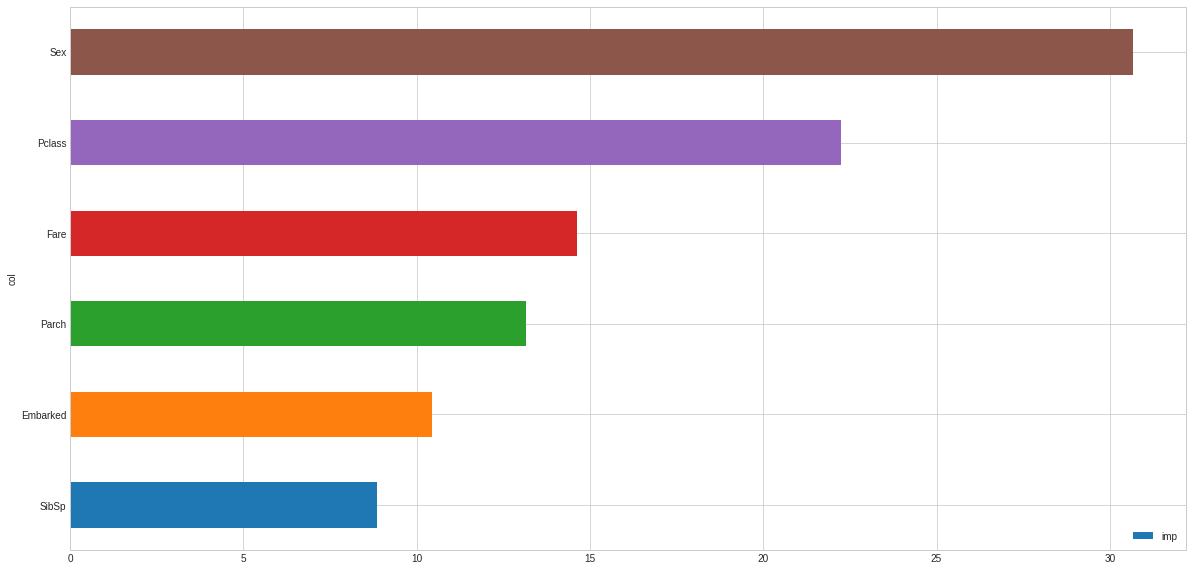

In [85]:
# Plot the feature importance scores
feature_importance(catboost_model, X_train)

#### Why would you want feature importance?

Featrue importance shows how much each feature contributed to the model.

You could take this information and remove features which don't contribute much to reduce dimenstionality (and save compute).

You could improve features which don't offer much to the overall model.

Or you could improve features which offer more to the model. In this case, there aren't many ways you could improve sex as it's already a binary.

Feature importance figures also show people who may not be familiar with the problem what features of their data are most important when it comes to making predictions with machine learning models.

## Precision and Recall

Precision and recall are two metrics which are used for cases where you have have an imbalanced classification problem.

For example, you may have 100,000 people and only 1 of them gets a certain disease. If your model predicts that all people don't have the disease, it only misses 1 in 100,000 so its accuracy is 99.999%. But this isn't really helpful.

This is where precision an recall come in.

**Recall** = a metric which measures a models ability to find all the relevant cases in a dataset.

Recall would be the models ability to find the 1 person in 100,000 who has the disease.

**Precision** = a metric which measures a models ability to correctly identify only relevant instances.

In our example, Precision would be if the model found the 1 person who had the disease, did they actually have the disease.

Combining the precision and recall, gives an **F1 score.**

These metrics will all fall between 0 and 1, with a higher value being better.

Although, they don't necessarily need to come into play for our Titantic problem, they're worth remembering for your future work.

In [86]:
metrics = ['Precision', 'Recall', 'F1', 'AUC']

eval_metrics = catboost_model.eval_metrics(train_pool,
                                           metrics=metrics,
                                           plot=True)

for metric in metrics:
    print(str(metric)+": {}".format(np.mean(eval_metrics[metric])))

Precision: 0.8885236676836308
Recall: 0.7299352941176471
F1: 0.8005888485845598
AUC: 0.9094382299367834


Recall is low, this means there's a higher amount of false negatives (predicting Did not survive when it was actually Survived).

Precision is higher therefore there's less false positives (predicting Survived, when it was actually Did not survive).

**Challenge:** What are some ways to visualise precision and recall? 
*Hint:* You may want to look into what a confusion matrix is, you can find much more information in this blog post: [Beyond Accuracy: Precision and Recall](https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c)

## Submission
Let's use the model with the highest cross-validation accuracy score to make a prediction on the test dataset and then submit our predictions to Kaggle.

We want to make predictions on the same kind of columnns our model is trained on.

So we have to select the subset of right columns of the `test` dateframe, encode them and make a prediciton with our model.

In [87]:
# We need our test dataframe to look like this one
X_train.head()

Pclass  Sex  SibSp  Parch  Fare  Embarked
0       2    1      1      0    18         2
1       0    0      1      0   207         0
2       2    0      0      0    41         2
3       0    0      1      0   189         2
4       2    1      0      0    43         2

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [88]:
# Our test dataframe has some columns our model hasn't been trained on
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [89]:
# Create a list of columns to be used for the predictions
wanted_test_columns = X_train.columns
wanted_test_columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [90]:
# Make a prediction using the CatBoost model on the wanted columns
predictions = catboost_model.predict(test[wanted_test_columns]
                                     .apply(LabelEncoder().fit_transform))

In [91]:
# Our predictions array is comprised of 0's and 1's (Survived or Did Not Survive)
predictions[:20]

array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1.])

In [92]:
# Create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = predictions # our model predictions on the test dataset
submission.head()

PassengerId  Survived
0          892       0.0
1          893       0.0
2          894       0.0
3          895       0.0
4          896       0.0

In [93]:
# What does our submission have to look like?
gender_submission.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

We need our `submission` dataframe to look like the `gender_submisison` dataframe, so we'll turn the `Survived` column into integers.

In [94]:
# Let's convert our submission dataframe 'Survived' column to ints
submission['Survived'] = submission['Survived'].astype(int)
print('Converted Survived column to integers.')

Converted Survived column to integers.


In [95]:
# How does our submission dataframe look?
submission.head()

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0

In [96]:
# Are our test and submission dataframes the same length?
if len(submission) == len(test):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

Submission dataframe is the same length as test (418 rows).


In [97]:
# Convert submisison dataframe to csv for submission to csv 
# for Kaggle submisison
submission.to_csv('catboost_submission.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!


In [98]:
# Check the submission csv to make sure it's in the right format
submissions_check = pd.read_csv("catboost_submission.csv")
submissions_check.head()

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0

### Now submit your .csv to Kaggle! 

https://www.kaggle.com/c/titanic/submit

## Possible Extensions

These are all possible options to improve this pipeline. I'd suggest starting with the feature engineering (improving and manipulating the existing data) first.

* What can you do with the `Age` feature?
    * How would fill up all the missing values?
    * You may want to look into the `interpolate()` function of Pandas for this
<br>
<br>
2. What can you do with the `Name` feature?
    * What titles did the passengers have? Did this influence their survival?
<br>
<br>
3. What can you do with the `Cabin` feature?
    * Is there a way to see whether they had a cabin or not?
<br>
<br>
4. Can you combine the `SibSp` and `Parch` features to see if the person was alone or not?
<br>
<br>
5. Could you do a PCA/feature analysis to see what features are more important than others?
    * Does removing the less important model features improve the model?
<br>
<br>
7. The models take a bunch of hyperparameters but we've mostly used the default settings, is there a way to find which hyperparameters are best to use?
    * Tip: Check out the `CatBoost` with Python tutorial and the [hyperopt library](https://github.com/hyperopt/hyperopt) to see if you can improve the CatBoost model

    

## References and Learn More

* [Sklearn Classification Notebook by Daniel Furasso](https://github.com/dformoso/sklearn-classification/blob/master/Data%20Science%20Workbook%20-%20Census%20Income%20Dataset.ipynb) - Daniel has done some epic work showing how you can take a bigger dataset, clean it up and perform some similar classification work from scratch. It would be a great next step after going through this one.
<br>

* [Encoding categorical features in Python blog post by Practical Python Business](http://pbpython.com/categorical-encoding.html) - this blog post sheds some great light on how to deal with categorical features in Python. The rest of the website contains plenty more great information for using Python in a business environment.
<br>

* [CatBoost Python tutorial on GitHub](https://github.com/catboost/tutorials/blob/master/python_tutorial.ipynb) - the tutorial is based on the Titanic Dataset and has some great tricks to improve the results in this notebook.
<br>

* [Shap library](https://github.com/slundberg/shap) - a great (and beautiful) alternative to viewing feature importance. Can you use this to improve on the feature importance graphics?

## Don't forget!
If you complete the challenges or get a better score than the one listed in this notebook, [tweet me](www.twitter.com/mrdbourke) (@mrdbourke) and I'll give your work a shout out.

Keep learning,

Daniel

daniel@mrdbourke.com